# Nomis Solutions - Team 7

In [1]:
reset -fs

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
eCar_df = pd.read_csv('Nomis Solutions_Data Part I.csv', encoding="utf-8-sig")

In [4]:
eCar_df.head()

,Tier,FICO,Approve Date,Term,Amount,Previous Rate,Car Type,Competition rate,Outcome,Rate,Cost of Funds,Partner Bin
0,3.0,695.0,7/1/02,72.0,35000.0,,N,6.25,0.0,7.49,1.8388,1.0
1,1.0,751.0,7/1/02,60.0,40000.0,,N,5.65,0.0,5.49,1.8388,3.0
2,1.0,731.0,7/1/02,60.0,18064.0,,N,5.65,0.0,5.49,1.8388,3.0
3,4.0,652.0,7/1/02,72.0,15415.0,,N,6.25,0.0,8.99,1.8388,3.0
4,1.0,730.0,7/1/02,48.0,32000.0,,N,5.65,0.0,5.49,1.8388,1.0


In [5]:
eCar_df.shape

(208088, 12)

In [6]:
eCar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208088 entries, 0 to 208087
Data columns (total 12 columns):
Tier                208085 non-null float64
FICO                208087 non-null float64
Approve Date        208085 non-null object
Term                208085 non-null float64
Amount              208085 non-null float64
Previous Rate       208077 non-null object
Car  Type           208085 non-null object
Competition rate    208085 non-null float64
Outcome             208085 non-null float64
Rate                208085 non-null float64
Cost of Funds       208085 non-null float64
Partner Bin         208085 non-null float64
dtypes: float64(9), object(3)
memory usage: 19.1+ MB


In [7]:
eCar_df.isnull().values.any()

True

In [8]:
pd.isnull(eCar_df).sum() 

Tier                 3
FICO                 1
Approve Date         3
Term                 3
Amount               3
Previous Rate       11
Car  Type            3
Competition rate     3
Outcome              3
Rate                 3
Cost of Funds        3
Partner Bin          3
dtype: int64

In [9]:
eCar_df.dropna(inplace=True)

In [10]:
eCar_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 208077 entries, 0 to 208078
Data columns (total 12 columns):
Tier                208077 non-null float64
FICO                208077 non-null float64
Approve Date        208077 non-null object
Term                208077 non-null float64
Amount              208077 non-null float64
Previous Rate       208077 non-null object
Car  Type           208077 non-null object
Competition rate    208077 non-null float64
Outcome             208077 non-null float64
Rate                208077 non-null float64
Cost of Funds       208077 non-null float64
Partner Bin         208077 non-null float64
dtypes: float64(9), object(3)
memory usage: 20.6+ MB


In [11]:
pd.isnull(eCar_df).sum() 

Tier                0
FICO                0
Approve Date        0
Term                0
Amount              0
Previous Rate       0
Car  Type           0
Competition rate    0
Outcome             0
Rate                0
Cost of Funds       0
Partner Bin         0
dtype: int64

In [12]:
#Have the user enter the cost of the loan, the interest rate, and
#the number of years for the loan
#Calculate monthly payments with the following formula
# M = L[i(1+i)n] / [(1+i)n-1]
# M = monthly payment
# L = Loan amount
# i = interest rate (for an interest rate of 5%, i = 0.05)
# n = number of payments
#________________________________________________________________________#
#Start of program
#Declare variables

#def monthly_loan_payments(loan_amount,interest_rate,number_payments): 
#    monthly_payment = (loan_amount * (1 + interest_rate/100)**
#(number_payments/12))/number_payments
    #print("Your monthly payment will be " + str(monthlypayment))
#    return monthly_payment

def monthly_loan_payment(row):
    loan_amount = row['Amount']
    interest_rate = row['Rate']
    number_payments = row['Term']
    monthly_payment = (loan_amount*(1+interest_rate/100)**(number_payments/12))/number_payments
    return monthly_payment

In [13]:
eCar_df['monthly_payment'] = eCar_df.apply(monthly_loan_payment,axis=1)

In [14]:
eCar_df.head()

,Tier,FICO,Approve Date,Term,Amount,Previous Rate,Car Type,Competition rate,Outcome,Rate,Cost of Funds,Partner Bin,monthly_payment
0,3.0,695.0,7/1/02,72.0,35000.0,,N,6.25,0.0,7.49,1.8388,1.0,749.797392
1,1.0,751.0,7/1/02,60.0,40000.0,,N,5.65,0.0,5.49,1.8388,3.0,870.893808
2,1.0,731.0,7/1/02,60.0,18064.0,,N,5.65,0.0,5.49,1.8388,3.0,393.295644
3,4.0,652.0,7/1/02,72.0,15415.0,,N,6.25,0.0,8.99,1.8388,3.0,358.864871
4,1.0,730.0,7/1/02,48.0,32000.0,,N,5.65,0.0,5.49,1.8388,1.0,825.570014


In [15]:
def npv(row):
    amount = row['Amount']
    cost_funds = row['Cost of Funds']/100
    m = row['monthly_payment']* 12
    term = row['Term']/12
    
    term = int(term)
    #cash_flow = [m/(1+cost_funds)**n for n in range(1,term+1)]
    
    x = 1/(1+cost_funds)
    net_prof_val = - amount + m*(x/(x - 1))*(x**term  - 1)
    return net_prof_val

In [16]:
eCar_df['NPV'] = eCar_df.apply(npv,axis=1)

In [17]:
eCar_df.head()

,Tier,FICO,Approve Date,Term,Amount,Previous Rate,Car Type,Competition rate,Outcome,Rate,Cost of Funds,Partner Bin,monthly_payment,NPV
0,3.0,695.0,7/1/02,72.0,35000.0,,N,6.25,0.0,7.49,1.8388,1.0,749.797392,15674.586950
1,1.0,751.0,7/1/02,60.0,40000.0,,N,5.65,0.0,5.49,1.8388,3.0,870.893808,9490.382514
2,1.0,731.0,7/1/02,60.0,18064.0,,N,5.65,0.0,5.49,1.8388,3.0,393.295644,4285.856743
3,4.0,652.0,7/1/02,72.0,15415.0,,N,6.25,0.0,8.99,1.8388,3.0,358.864871,8838.657498
4,1.0,730.0,7/1/02,48.0,32000.0,,N,5.65,0.0,5.49,1.8388,1.0,825.570014,5870.590554


In [18]:
def monthly_loan_payment_competitor(row):
    loan_amount = row['Amount']
    interest_rate = row['Competition rate']
    number_payments = row['Term']
    monthly_payment = (loan_amount*(1+interest_rate/100)**(number_payments/12))/number_payments
    return monthly_payment

In [19]:
eCar_df['monthly_payment_competitor'] = eCar_df.apply(monthly_loan_payment_competitor,axis=1)

In [20]:
def npv_competitor(row):
    amount = row['Amount']
    cost_funds = row['Cost of Funds']/100
    m = row['monthly_payment_competitor']*12
    term = row['Term']/12
    
    term = int(term)
    #cash_flow = [m/(1+cost_funds)**n for n in range(1,term+1)]
    x = 1/(1+cost_funds)
    net_prof_val = -amount + m*(x/(x - 1))*(x**term  - 1)
    return net_prof_val

In [21]:
eCar_df['NPV_Competitor'] = eCar_df.apply(npv_competitor,axis=1)

In [22]:
eCar_df.head()

,Tier,FICO,Approve Date,Term,Amount,Previous Rate,Car Type,Competition rate,Outcome,Rate,Cost of Funds,Partner Bin,monthly_payment,NPV,monthly_payment_competitor,NPV_Competitor
0,3.0,695.0,7/1/02,72.0,35000.0,,N,6.25,0.0,7.49,1.8388,1.0,749.797392,15674.586950,699.373513,12266.720684
1,1.0,751.0,7/1/02,60.0,40000.0,,N,5.65,0.0,5.49,1.8388,3.0,870.893808,9490.382514,877.518433,9866.840852
2,1.0,731.0,7/1/02,60.0,18064.0,,N,5.65,0.0,5.49,1.8388,3.0,393.295644,4285.856743,396.287324,4455.865329
3,4.0,652.0,7/1/02,72.0,15415.0,,N,6.25,0.0,8.99,1.8388,3.0,358.864871,8838.657498,308.024077,5402.614267
4,1.0,730.0,7/1/02,48.0,32000.0,,N,5.65,0.0,5.49,1.8388,1.0,825.570014,5870.590554,830.590093,6100.871867


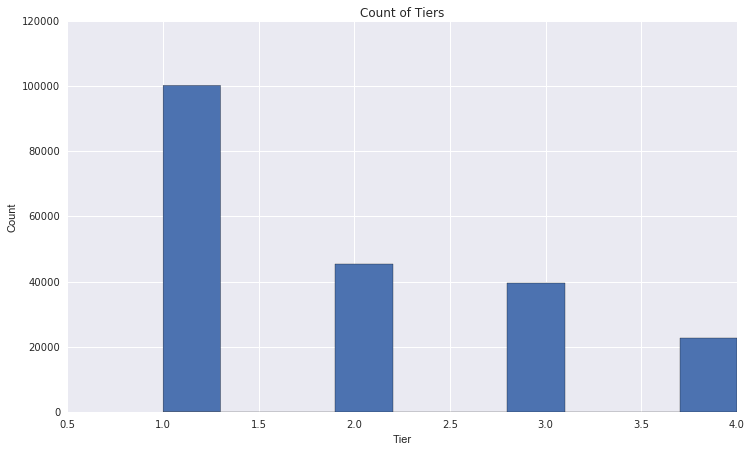

In [63]:
plt.figure(figsize=(12,7))
plt.xlabel('Tier')
plt.ylabel('Count')
plt.title('Count of Tiers')
eCar_df['Tier'].hist();

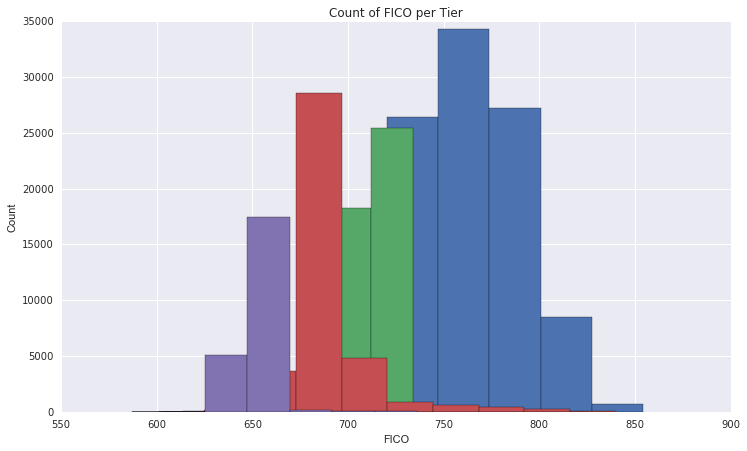

In [64]:
plt.figure(figsize=(12,7))
plt.xlabel('FICO')
plt.ylabel('Count')
plt.title('Count of FICO per Tier')
eCar_df.groupby('Tier')['FICO'].hist();

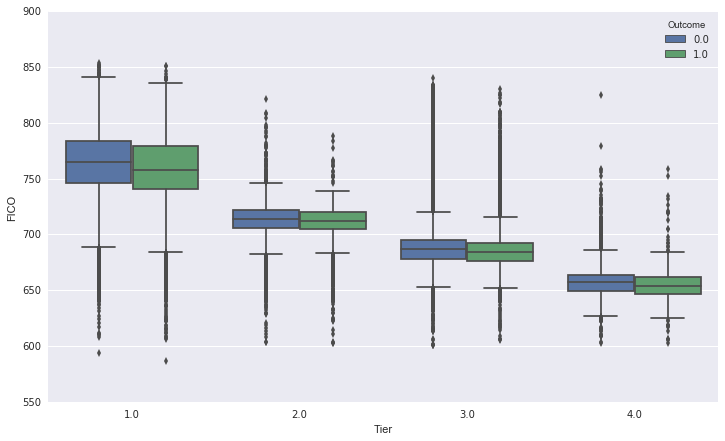

In [65]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Tier', y='FICO', data=eCar_df, hue='Outcome');

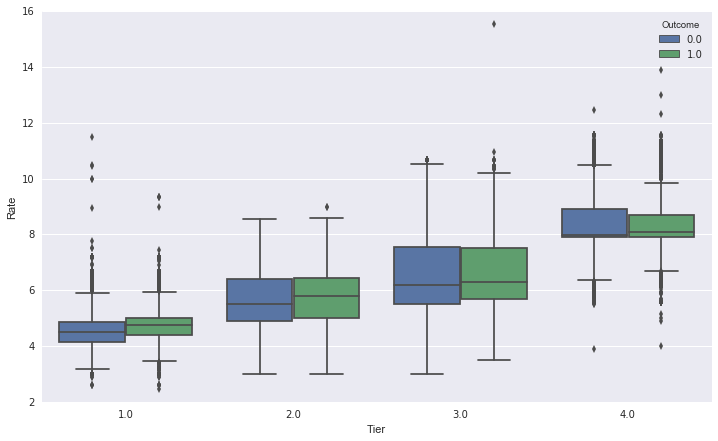

In [66]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Tier', y='Rate', data=eCar_df, hue='Outcome');

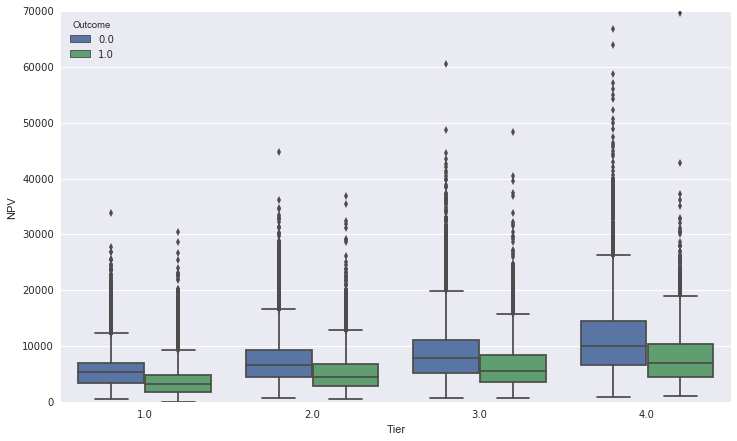

In [67]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Tier', y='NPV', data=eCar_df, hue='Outcome');

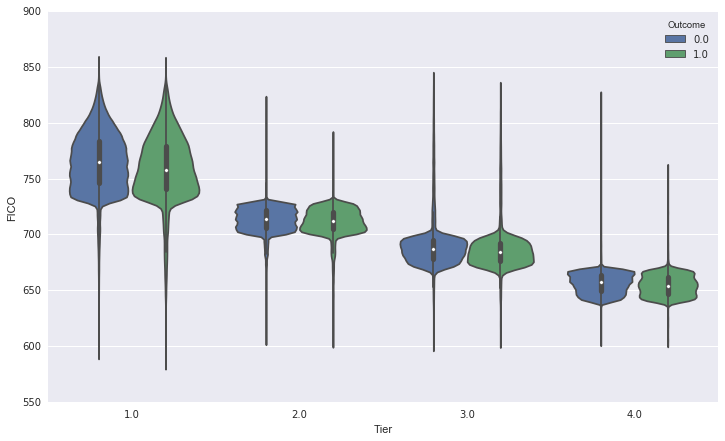

In [68]:
plt.figure(figsize=(12,7))
sns.violinplot(x='Tier', y='FICO', data=eCar_df, hue='Outcome');

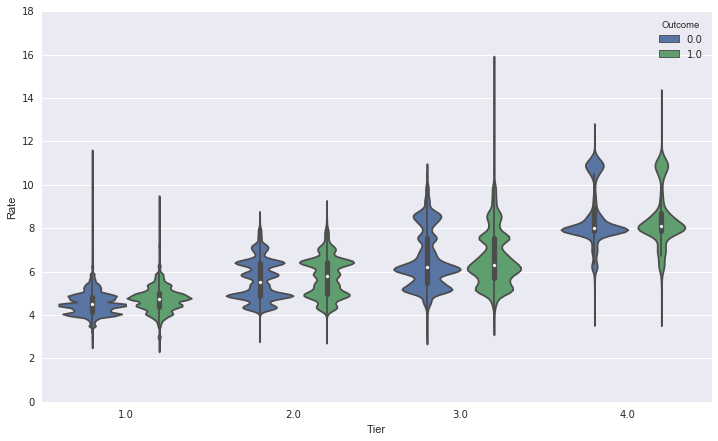

In [69]:
plt.figure(figsize=(12,7))
sns.violinplot(x='Tier', y='Rate', data=eCar_df, hue='Outcome');